# Lab 3: ATLAS Data Analysis

**Name:** Jamie Vasquez-Rojas

**Date:** April 28, 2025

## Part 1: The Invariant Mass Distribution

In [3]:
#lab 3
#part 1

#1.1 - load the data from atlaz_z_to_ll.csv

#importing the CSV file for data traces:
#first load the libraries
import os
import csv
import numpy as np

atlas_data = np.genfromtxt("atlas_z_to_ll.csv",  delimiter = ',', 
                       skip_header=1, usecols=(0, 1, 2, 3, 4, 5, 6, 7))
#col 0 = pt1, col 1 = pt2, col 2 = eta1, col3 = eta2, col4 = ph1, col5 = phi2, col6 = E1, col7 = E2
#checking if the data matches with the print below
#print(new_data[0:1])  

#designating the columns to the data
pt1 = atlas_data[:,0] #GeV
pt2 = atlas_data[:,1] #Gev
eta1 = atlas_data[:,2] #rad?
eta2 = atlas_data[:,3] #rad?
phi1 = atlas_data[:,4] #rad
phi2 = atlas_data[:,5] #rad
E1 = atlas_data[:,6] #GeV
E2 = atlas_data[:,7] #GeV

# definitions to remind myself
#pt = transverse-momentum: describes the momentum the particle has in the transverse direction
#eta (n looking thing) = pseudorapidity: the angle the particle makes wrt the beamline
#phi = azimuthal angle?
#E = total energy

In [4]:
#1.2 - for each lepton pair, calculate the mass of a hypothetical particle which decayed to produce that pair
#x-component
px1 = pt1*np.cos(phi1)
px2 = pt2*np.cos(phi2)
px_tot = px1 + px2

#y-component
py1 = pt1*np.sin(phi1)
py2 = pt2*np.sin(phi2)
py_tot = py1 + py2

#z-component
pz1 = pt1*np.sinh(eta1)
pz2 = pt2*np.sinh(eta2)
pz_tot = pz1 + pz2

#find M
E_tot = E1 + E2
M = np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))
print(M)

[92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693]


Text(0.5, 1.0, 'Part 1 - Calculated Invariant Mass')

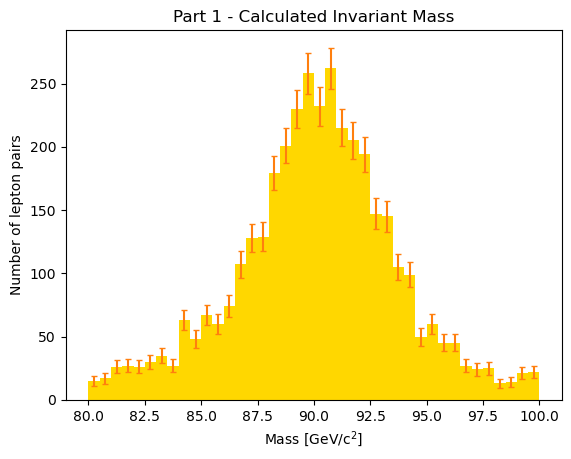

In [5]:
#1.3 - make a histogram, with error bars, of the calculated invariant mass
import matplotlib.pyplot as plt

bins = np.linspace(80, 100, 41)

fig, histo = plt.subplots()
yval, bin_edges, other = histo.hist(M, bins = bins, color = 'gold') #capture the important outputs to use for error bars

#find the bin center locations
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

#plot the error bars
histo.errorbar(
    bin_centers,
    yval,
    yerr = np.sqrt(yval),
    marker = '.', 
    fmt = 'none', 
    color = 'C1', 
    capsize = 2
)

#labels
histo.set_xlabel('Mass [GeV/c$^2$]')
histo.set_ylabel('Number of lepton pairs')
histo.set_title('Part 1 - Calculated Invariant Mass')


## Part 2: Breit-Wigner Fit

2.4 - Chi-Squared Test and Analysis:
  Chi^2 = 9.985
  Degrees of Freedom = 10
  Reduced Chi^2 = 0.999
  p Value = 0.44
2.5 - Best Fits
  m0 = 90.3 +/- 0.09 GeV/c^2
  Gamma = 6.39 +/- 0.2 GeV/c^2


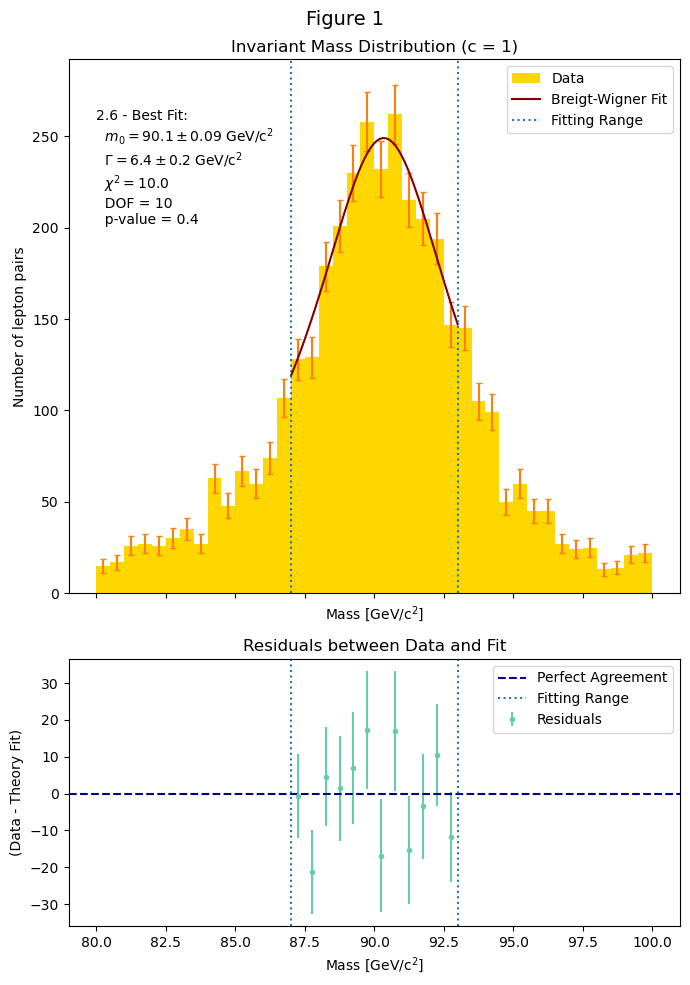

In [7]:
#part 2
#2.1 - code up function for decay distribution

def decay(m, m0, Gam):
    return (5000/2)*(Gam/2)/(np.pi * (np.power(m - m0, 2) + np.power(Gam/2, 2)))

#2.2 - fit decay distribution to theory
mask = (bin_centers > 87) & (bin_centers < 93)

import scipy

fit_par, pcov = scipy.optimize.curve_fit(
    f = decay, #the fit we want
    # replace with corresponding data below
    xdata = bin_centers[mask], #based on this data
    ydata = yval[mask],
    sigma = np.sqrt(yval[mask]), #with this uncertainty
    absolute_sigma = True
)
m0 = fit_par[0] # GeV/c^2
Gam = fit_par[1] # GeV/c^2

# and then find the uncertainties for each parameter
#making a matrix, and the sqrt of the diagonal gives the uncertainty
unc_matrix = np.sqrt(np.diag(pcov))
m0_unc = unc_matrix[0] # GeV/c^2
Gam_unc = unc_matrix[1] # GeV/c^2

#2.3 - plot the data overlayed with fit
#plot the original data
fig, (fit, res) = plt.subplots(2, 1, figsize = (7, 10), sharex = True, gridspec_kw = {'height_ratios': [2,1]})
yval, bin_edges, other = fit.hist(M, bins = bins, color = 'gold', label = 'Data') #capture the important outputs to use for error bars

#find the bin center locations
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

#plot the error bars
fit.errorbar(
    bin_centers,
    yval,
    yerr = np.sqrt(yval),
    marker = '.', 
    fmt = 'none', 
    color = 'C1', 
    capsize = 2
)

#labels
fit.set_xlabel('Mass [GeV/c$^2$]')
fit.set_ylabel('Number of lepton pairs')
fit.set_title('Invariant Mass Distribution (c = 1)')
fig.suptitle('Figure 1', size = 14)

#plot the theory
dummy_bins = np.linspace(87, 93, 100)
decay_th_dummy = decay(dummy_bins, m0, Gam)
decay_th = decay(bin_centers[mask], m0, Gam)
fit.plot(dummy_bins, decay_th_dummy, color = 'maroon', label = 'Breigt-Wigner Fit')

#plot the residuals
decay_data = yval[mask]
residuals = decay_data - decay_th
res.errorbar(bin_centers[mask], residuals, yerr = np.sqrt(decay_data), fmt = '.', label = 'Residuals', color = 'mediumaquamarine')
res.axhline(0, ls = '--', color = 'darkblue', label = 'Perfect Agreement')
res.set_ylabel('(Data - Theory Fit)')
res.set_title('Residuals between Data and Fit')
res.set_xlabel('Mass [GeV/c$^2$]')

#fitting range vertical lines
fit.axvline(87, ls = ':', label = 'Fitting Range')
fit.axvline(93, ls = ':')

res.axvline(87, ls = ':', label = 'Fitting Range')
res.axvline(93, ls = ':')

fit.legend()
res.legend()

fig.tight_layout()

#2.4 - chisq, redchisq, p val (within fitting range)
#chi sq test 
num_params = 2 #2 fit params m0 and Gam
chi2 = np.sum(np.power(residuals, 2) / np.power(np.sqrt(decay_data), 2))
dof = len(decay_data) - num_params            
red_chi2 = chi2/dof

import scipy.stats as st

p_value = st.chi2.sf(chi2, dof)

print('2.4 - Chi-Squared Test and Analysis:')
print(f'  Chi^2 = {chi2:0.4}')
print(f'  Degrees of Freedom = {dof}')
print(f'  Reduced Chi^2 = {red_chi2:0.3}')
print(f'  p Value = {p_value:0.2}')
#2.5 - best fits
print('2.5 - Best Fits')
print(f'  m0 = {m0:0.3} +/- {m0_unc:0.1} GeV/c^2')
print(f'  Gamma = {Gam:0.3} +/- {Gam_unc:0.1} GeV/c^2')

#2.6 - annotate plot
txt = '2.6 - Best Fit: \n  $m_0 = 90.1 \pm 0.09$ GeV/c$^2$ \n  $\Gamma = 6.4 \pm 0.2 $ GeV/c$^2$ \n  $\chi^2 = 10.0$ \n  DOF = 10 \n  p-value = 0.4'
fit.annotate(txt, (80, 202))

plt.savefig('F1-massdist+fit.png', dpi =300)

## Part 3: 2D Parameter Contours


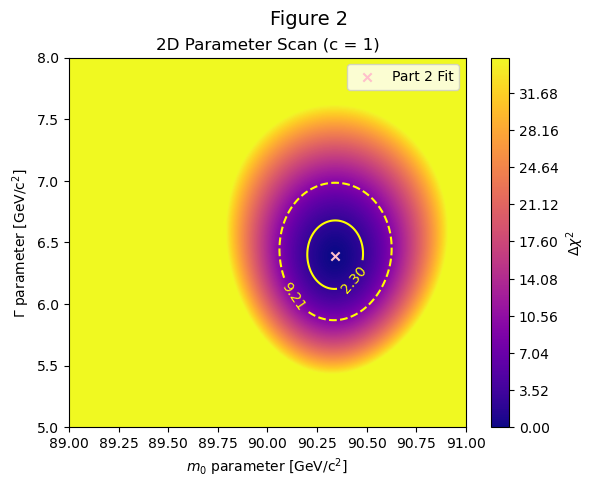

In [9]:
#part 3
#3.1 - 2D Chi-sq scan
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
M0 = np.linspace(89, 91, n_bins) #GeV/c^2
GAM = np.linspace(5, 8, n_bins) #GeV/C^2

x_data = bin_centers[mask]
y_data = yval[mask]

#the double for loop
for i in range(n_bins):
    for j in range(n_bins):
        theory = decay(x_data, M0[i], GAM[j])
        chi2 = np.sum((theory - y_data)**2 / (np.sqrt(yval)[mask])**2)
        chi_map[j, i] = chi2

#3.2 - delta chisq
chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min + 35) #clip to 35
delta_chi_map = chi_map - chi_min

#visualize
X, Y = np.meshgrid(M0, GAM)
fig2, scan = plt.subplots()
#call the contour function
cs = scan.contourf(X, Y, delta_chi_map, 500, cmap = 'plasma') #500 levels
#make colorbar
cbar = fig2.colorbar(cs, ax = scan)

#plot 1sig and 3sig
# N = 2, so do 2.30 to 9.21
cbar.set_label('$\Delta \chi ^2$')

levels = [2.3, 9.21]
CS = scan.contour(X, Y, delta_chi_map, levels = levels, colors = ['yellow', 'yellow'], linestyles = ['solid', 'dashed'])

scan.clabel(CS)

scan.set_xlabel('$m_0$ parameter [GeV/c$^2$]')
scan.set_ylabel('$\Gamma$ parameter [GeV/c$^2$]')
scan.set_title('2D Parameter Scan (c = 1)')
fig2.suptitle('Figure 2', size = 14)

scan.scatter(m0, Gam, marker = 'x', color = 'pink', label = 'Part 2 Fit')
scan.legend()

plt.savefig('F2-ParameterScan.png', dpi =300)

In [10]:
#For Discussion Section
#compare to PDG value
mPDG = 91.1880 #+/- 0.0020 GeV/c^2
diff = mPDG - m0 #GeV/c^2
print(f'The PDG Value is slightly larger than the fit value by {diff:0.1} GeV/c^2')

The PDG Value is slightly larger than the fit value by 0.8 GeV/c^2
